# 대망의 이미지 만드는 날

In [2]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess as sp

In [3]:
def imshow(tit, image):
    plt.figure(figsize=(9,9))
    plt.title(tit)
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap="gray")
    plt.show()

## 빈 화면을 만듭니다.

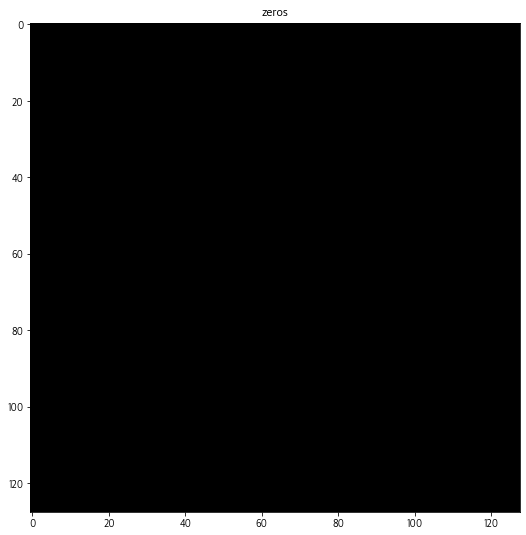

In [9]:
empty = np.zeros([128,128])
empty
imshow('zeros',empty)

## 저번 시간에 잘라놨던 로그를 바이너리화
- subprocess 라이브러리를 이용하여 terminal에 직접 xxd 명령어를 수행하게 한다.

In [5]:
out = subprocess.check_output(['xxd','-p','../split_by_1min/2020-08-24_10-00-1.csv'])
out = str(out)
out = out[2:-1].replace('\\n', '')
out

'323032302d30382d32342031303a30303a31382c4745542c485454502f312e312c3230302c2222222d2222222c2f313030302f77702d696e636c756465732f2c3130312e3232342e33322e32382c4d6f7a696c6c612f352e3020284d6163696e746f73683b20496e74656c204d6163204f53205820782e793b2072763a34322e3029204765636b6f2f32303130303130312046697265666f782f34322e302c2d2c363232362e302c310a323032302d30382d32342031303a30303a31382c4745542c485454502f312e312c3230302c2222222d2222222c2f313030302f77702d6c6f67696e2f2c3130312e3232342e33322e32382c4d6f7a696c6c612f352e3020284d6163696e746f73683b20496e74656c204d6163204f53205820782e793b2072763a34322e3029204765636b6f2f32303130303130312046697265666f782f34322e302c2d2c363232362e302c310a323032302d30382d32342031303a30303a31382c4745542c485454502f312e312c3230302c2222222d2222222c2f313030302f77702d72656769737465722f2c3130312e3232342e33322e32382c4d6f7a696c6c612f352e3020284d6163696e746f73683b20496e74656c204d6163204f53205820782e793b2072763a34322e3029204765636b6f2f32303130303130312046697265666f782f34322e302c2d2c363

## 두 글자씩 잘라서 리스트에 넣습니다.

In [7]:
length = 2
outListHex = list(map(''.join, zip(*[iter(out)]*length)))
outListInt = [int(x, 16) for x in result]
if len(outListInt) % 2 != 0:
    outListInt.append(0)
outArray = np.array(outListInt)
outArray = outArray.reshape(-1,2)
outArray.shape

(761, 2)

## 맨처음 만든 빈화면에 좌표값 찍어주기

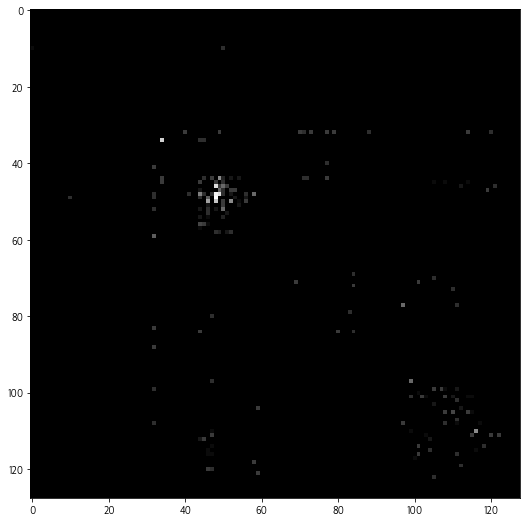

In [10]:
for i, j in outArray:
    empty[i, j] += 1
imshow('',empty)

## 만들어진 이미지를 파일로 저장하기

In [12]:
cv2.imwrite('../imgdataset/2020-08-24_10-00-1.bmp', empty)

True

# 위 과정을 함축하기

## 파일명 가져오기

In [78]:
logFileName = subprocess.check_output(['ls','../logSplitDataset/'])
logFileName = str(logFileName)
logFileNameList = logFileName[2:-3].split('\\n')
logFileNameList

['2020-08-24_10-00-1.csv',
 '2020-08-24_10-01-1.csv',
 '2020-08-24_10-02-1.csv',
 '2020-08-24_10-03-1.csv',
 '2020-08-24_10-04-0.csv',
 '2020-08-24_10-05-1.csv',
 '2020-08-24_10-06-1.csv',
 '2020-08-24_10-07-1.csv',
 '2020-08-24_10-08-0.csv',
 '2020-08-24_10-09-0.csv',
 '2020-08-24_10-10-0.csv',
 '2020-08-24_10-11-0.csv',
 '2020-08-24_10-12-0.csv',
 '2020-08-24_10-13-1.csv',
 '2020-08-24_10-14-0.csv',
 '2020-08-24_10-15-1.csv',
 '2020-08-24_10-16-1.csv',
 '2020-08-24_10-17-1.csv',
 '2020-08-24_10-18-1.csv',
 '2020-08-24_10-19-1.csv',
 '2020-08-24_10-20-1.csv',
 '2020-08-24_10-21-1.csv',
 '2020-08-24_10-22-1.csv',
 '2020-08-24_10-23-1.csv',
 '2020-08-24_10-24-0.csv',
 '2020-08-24_10-24-1.csv',
 '2020-08-24_10-25-1.csv',
 '2020-08-24_10-26-1.csv',
 '2020-08-24_10-27-1.csv',
 '2020-08-24_10-28-1.csv',
 '2020-08-24_10-29-1.csv',
 '2020-08-24_10-30-1.csv',
 '2020-08-24_10-31-1.csv',
 '2020-08-24_10-32-1.csv',
 '2020-08-24_10-33-1.csv',
 '2020-08-24_10-34-1.csv',
 '2020-08-24_10-35-1.csv',
 

## 이미지 파일명 만들기

In [50]:
imgFileNameList = [log.replace('.csv', '.png') for log in logFileNameList]
imgFileNameList

['2020-08-24_10-00-1.png',
 '2020-08-24_10-01-1.png',
 '2020-08-24_10-02-1.png',
 '2020-08-24_10-03-1.png',
 '2020-08-24_10-04-0.png',
 '2020-08-24_10-05-1.png',
 '2020-08-24_10-06-1.png',
 '2020-08-24_10-07-1.png',
 '2020-08-24_10-08-0.png',
 '2020-08-24_10-09-0.png',
 '2020-08-24_10-10-0.png',
 '2020-08-24_10-11-0.png',
 '2020-08-24_10-12-0.png',
 '2020-08-24_10-13-1.png',
 '2020-08-24_10-14-0.png',
 '2020-08-24_10-15-1.png',
 '2020-08-24_10-16-1.png',
 '2020-08-24_10-17-1.png',
 '2020-08-24_10-18-1.png',
 '2020-08-24_10-19-1.png',
 '2020-08-24_10-20-1.png',
 '2020-08-24_10-21-1.png',
 '2020-08-24_10-22-1.png',
 '2020-08-24_10-23-1.png',
 '2020-08-24_10-24-1.png',
 '2020-08-24_10-25-1.png',
 '2020-08-24_10-26-1.png',
 '2020-08-24_10-27-1.png',
 '2020-08-24_10-28-1.png',
 '2020-08-24_10-29-1.png',
 '2020-08-24_10-30-1.png',
 '2020-08-24_10-31-1.png',
 '2020-08-24_10-32-1.png',
 '2020-08-24_10-33-1.png',
 '2020-08-24_10-34-1.png',
 '2020-08-24_10-35-1.png',
 '2020-08-24_10-36-1.png',
 

In [79]:
for fileName in logFileNameList:
    imgFileName = fileName.replace('.csv', '.png')
    
    out = subprocess.check_output(['xxd','-p',f'../logSplitDataset/{fileName}'])
    out = str(out)
#     print(out)
    out = out[2:-1].replace('\\n', '')
    length = 2
    outListHex = list(map(''.join, zip(*[iter(out)]*length)))
    outListInt = [int(x, 16) for x in outListHex]
    if len(outListInt) % 2 != 0:
        outListInt.append(0)
    outArray = np.array(outListInt)
    outArray = outArray.reshape(-1,2)
    
    empty = np.zeros([128, 128])
    empty = empty.astype('uint8')
    for x, y in outArray:
        empty[x, y] += 4
#         cv2.circle(empty, (x, y), 8, (255,255,255), 1)
#     print(empty)
    cv2.imwrite(f'../imgDataset/{imgFileName}', empty)

# 전체 파일로 이미지 만들기

In [66]:
df = pd.read_csv('../dataset/track1.csv', index_col = "Timestamp")
df.index = pd.to_datetime(df.index)
df['Attack'] = 0
attacker = ['101.224.32.28', '231.211.11.16', '137.8.46.133', '100.200.156.222', '112.112.181.134', '188.45.31.10', '188.45.31.20', '188.45.31.30', '188.45.31.40', '14.135.56.110', '14.135.56.120', '14.135.56.130', '14.135.56.140']
df['Attack'] = np.where(df['Host'].isin(attacker), 1, 0)
df.head()

,Method,Protocol,Status,Referer,Path,Host,UA,Payload,Bytes,Attack
Timestamp,,,,,,,,,,
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp-includes/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6226.0,1
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp-login/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6226.0,1
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp-register/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6232.0,1
2020-08-24 10:00:18,GET,HTTP/1.1,200,"""-""",/1000/wp/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6248.0,1
2020-08-24 10:00:19,GET,HTTP/1.1,200,"""-""",/1000/wp-content/,101.224.32.28,Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv...,-,6224.0,1


In [75]:
days = [24, 25, 26, 27, 28]
hours = list(range(10, 24))
minutes = list(range(60))


In [85]:
splitByMinute.reset_index()[['Method','Status','Referer','Path','UA','Payload','Bytes']]

,Method,Status,Referer,Path,UA,Payload,Bytes
0,GET,200,"""xe.coldshop.kr/notice?mid=notice&page=7""",/notice/notice21?mid=notice,Mozilla/5.0 (X11; CrOS i686 4319.74.0) AppleWe...,-,5562.0
1,GET,200,"""wp.hotpost.kr/""",/?p=1134,Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKi...,-,23397.0
2,GET,200,"""wp.hotpost.kr/""",/?p=1620,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,-,23374.0
3,GET,200,"""wp.hotpost.kr/""",/?p=7827,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,-,24499.0
4,GET,200,"""xe.coldshop.kr/shop?mid=shop&page=2""",/shops/shop24?mid=shop,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,-,2022.0
5,GET,200,"""wp.hotpost.kr/""",/?p=1466,Mozilla/5.0 (X11; Ubuntu; Linux x86_64) AppleW...,-,23612.0
6,GET,200,"""xe.coldshop.kr/shop?mid=shop&page=4""",/shops/shop95?mid=shop,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6...,-,2024.0
7,GET,200,"""xe.coldshop.kr/shop?mid=shop&page=1""",/shops/shop21?mid=shop,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2)...,-,2024.0
8,GET,200,"""xe.coldshop.kr/notice?mid=notice&page=3""",/notice/notice22?mid=notice,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,-,5563.0
9,GET,200,"""xe.coldshop.kr/shop?mid=shop&page=5""",/shops/shop41?mid=shop,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,-,2021.0


In [87]:
for day in days:
    for hour in hours:
        for minute in minutes:
            splitByMinute = df['2020-08-{0} {1:02d}:{2:02d}'.format(day, hour, minute)]
            if len(splitByMinute[splitByMinute['Attack'] == 1]) > 0:
                splitByMinute = splitByMinute.reset_index()[['Method','Status','Referer','Path','Payload','Bytes']]
                splitByMinute.to_csv('../logSplitDataset/2020-08-{0}_{1:02d}-{2:02d}-1.csv'.format(day, hour, minute), header=None)
            else:
                splitByMinute = splitByMinute.reset_index()[['Method','Status','Referer','Path','Payload','Bytes']]
                splitByMinute.to_csv('../logSplitDataset/2020-08-{0}_{1:02d}-{2:02d}-0.csv'.format(day, hour, minute), header=None)

KeyError: '2020-08-28 19:47'

In [89]:
for fileName in logFileNameList:
    imgFileName = fileName.replace('.csv', '.png')
    
    out = subprocess.check_output(['xxd','-p',f'../logSplitDataset/{fileName}'])
    out = str(out)
#     print(out)
    out = out[2:-1].replace('\\n', '')
    length = 2
    outListHex = list(map(''.join, zip(*[iter(out)]*length)))
    outListInt = [int(x, 16) for x in outListHex]
    if len(outListInt) % 2 != 0:
        outListInt.append(0)
    outArray = np.array(outListInt)
    outArray = outArray.reshape(-1,2)
    
    empty = np.zeros([128, 128])
    empty = empty.astype('uint8')
    for x, y in outArray:
        empty[x, y] += 1
#         cv2.circle(empty, (x, y), 8, (255,255,255), 1)
#     print(empty)
    cv2.imwrite(f'../imgDataset/{imgFileName}', empty)